## Its a trial to demonstrate the Quantum Tomography
Preparing Environment


In [1]:
from scipy.linalg import expm
from scipy.sparse.linalg import eigsh
import numpy as np
import dataset
import pickle

In [33]:
N = 9
T_list = np.arange(0.2, 1, 0.05)
nor = np.arange(0.5, 1, 0.05)
nor = np.arange(0.5, 1.5, 0.05)
J = 1
# h_list = np.array(np.arange(18, 21, 0.1))
h_list=np.array(np.arange(0, 1, 0.02))

In [5]:
print(np.arange(1.8, 2.6, 0.1))
print(np.arange(0.2, 1.2, 1))

[1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5]
[0.2]


In [35]:
# save states

for T in T_list:
    for h in h_list:
        ising_hamiltonian = dataset.IsingHamiltonian(n_qubits = N, J = 1-h, h = h)

        simulator = dataset.GibbsStateSimulator(ising_hamiltonian)

        # Simulate the Gibbs state over a temperature range
        gibbs_states = simulator.simulate_temperature_scan(T, T+1, 1)

        filename = f'gibbs_dataset/gibbs_ising_nq{N}_T{round(T, 2)}_h{round(h, 4)}_J{round(1-h,4)}'
        simulator.save_gibbs_states_to_pkl(gibbs_states, filename)



Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.0_J1.0
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.02_J0.98
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.04_J0.96
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.06_J0.94
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.08_J0.92
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.1_J0.9
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.12_J0.88
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.14_J0.86
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.16_J0.84
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.18_J0.82
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.2_J0.8
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.22_J0.78
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.24_J0.76
Gibbs states saved to gibbs_dataset/gibbs_ising_nq9_T0.2_h0.26_J0.74
Gibbs states saved to gibbs_dataset/gibb

### Local pauli term $<\sigma_1^z \sigma_j^z>$, $1 < j \leq N$

In [43]:
for T in T_list:
    for h in h_list:
        # load gibbs state
        filename = f'gibbs_dataset/gibbs_ising_nq{N}_T{round(T, 2)}_h{round(h, 4)}_J{round(1-h,4)}'
        
        with open(filename, "rb") as f:
            gibbs_states = pickle.load(f)
            gibbs_states = gibbs_states[T]

        # obs
        corr_term_each_h = []
        for j in range(1, N):
            obs =  [dataset.Z] +  [dataset.I] * (N - 1)
            obs[j] = dataset.Z
            zz_obs = dataset.kron_n(obs)

            # calulate correlation term
            corr_term = np.trace(gibbs_states * zz_obs)
            corr_term_each_h.append(corr_term)
        
        # print(corr_term_each_h)
        if 1 - h == 1.0:
            fn = f'correlation/Z_gibbs_ising_nq{N}_T{round(T, 2)}_h{round(h*J, 2)}_J{round(1,2)}'
        else:
            fn = f'correlation/Z_gibbs_ising_nq{N}_T{round(T, 2)}_h{round(h*J, 2)}_J{round(1-h,2)}'
        print(fn)
        np.save(fn, corr_term_each_h)
    

correlation/Z_gibbs_ising_nq9_T0.2_h0.0_J1
correlation/Z_gibbs_ising_nq9_T0.2_h0.02_J0.98
correlation/Z_gibbs_ising_nq9_T0.2_h0.04_J0.96
correlation/Z_gibbs_ising_nq9_T0.2_h0.06_J0.94
correlation/Z_gibbs_ising_nq9_T0.2_h0.08_J0.92
correlation/Z_gibbs_ising_nq9_T0.2_h0.1_J0.9
correlation/Z_gibbs_ising_nq9_T0.2_h0.12_J0.88
correlation/Z_gibbs_ising_nq9_T0.2_h0.14_J0.86
correlation/Z_gibbs_ising_nq9_T0.2_h0.16_J0.84
correlation/Z_gibbs_ising_nq9_T0.2_h0.18_J0.82
correlation/Z_gibbs_ising_nq9_T0.2_h0.2_J0.8
correlation/Z_gibbs_ising_nq9_T0.2_h0.22_J0.78
correlation/Z_gibbs_ising_nq9_T0.2_h0.24_J0.76
correlation/Z_gibbs_ising_nq9_T0.2_h0.26_J0.74
correlation/Z_gibbs_ising_nq9_T0.2_h0.28_J0.72
correlation/Z_gibbs_ising_nq9_T0.2_h0.3_J0.7
correlation/Z_gibbs_ising_nq9_T0.2_h0.32_J0.68
correlation/Z_gibbs_ising_nq9_T0.2_h0.34_J0.66
correlation/Z_gibbs_ising_nq9_T0.2_h0.36_J0.64
correlation/Z_gibbs_ising_nq9_T0.2_h0.38_J0.62
correlation/Z_gibbs_ising_nq9_T0.2_h0.4_J0.6
correlation/Z_gibbs_ising

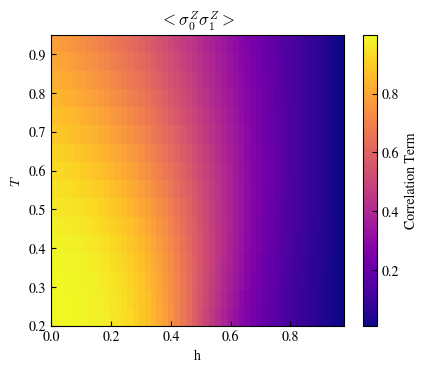

In [ ]:
# define figure size
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, BoundaryNorm
centimeter_to_inch = 1 / 2.54
figure_width = centimeter_to_inch * 12
figure_height = figure_width * 0.8
fig = plt.figure(figsize=(figure_width, figure_height))  # size in inches
ax = fig.add_subplot(1, 1, 1)

# set all fonts
font_family = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = font_family

# set ticks in
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# font size
font_size_name_xy = 30
font_size_tick_label = 26
font_size_legend = 16
font_xy = {'family': font_family, 'size': font_size_name_xy}
font_legend = {'family': font_family, 'size': font_size_legend}

heatmap_data = np.zeros((len(T_list), len(h_list)))
J_list = 1 - h_list  # J depends on h

for T in range(len(T_list)):
    for h in range(len(h_list)):
        
        if h == 0:
            fn = f'correlation/Z_gibbs_ising_nq{N}_T{round(T_list[T], 2)}_h{0.0}_J{round(1-h,2)}.npy'
        else:
            fn = f'correlation/Z_gibbs_ising_nq{N}_T{round(T_list[T], 2)}_h{round(h_list[h]*J, 2)}_J{round(1-h_list[h],2)}.npy'
        corr_term = np.load(fn)
        heatmap_data[T, h] = np.real(corr_term[0])

# # Create a custom colormap
# colors = [
#     (1, 0, 0),  # Red for low values (0 to 0.1)
#     (1, 1, 1),  # White for mid-range (0.1 to 0.2)
#     (0, 0, 1)   # Blue for higher values (above 0.2)
# ]
# positions = [0.0, 0.1, 0.2, 1.0]  # Correct positions for color transitions
# cmap = LinearSegmentedColormap.from_list("custom_cmap", colors)

# # Ensure that the positions are normalized
# assert positions[0] == 0 and positions[-1] == 1, "Positions must start at 0 and end at 1"

plt.imshow(heatmap_data, extent=[min(h_list), max(h_list), min(T_list), max(T_list )],
           origin='lower', aspect='auto', cmap="plasma")  # Change cmap if needed
plt.colorbar(label='Correlation Term')  # Add colorbar
plt.title(r"$<\sigma_0^Z \sigma_1^Z>$")
plt.ylabel(r'$T$')
plt.xlabel("h")
plt.show()
    

# plt.legend()


c:\Users\Zhu Chenghong\anaconda3\envs\trash\lib\site-packages\matplotlib\cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Zhu Chenghong\anaconda3\envs\trash\lib\site-packages\matplotlib\cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


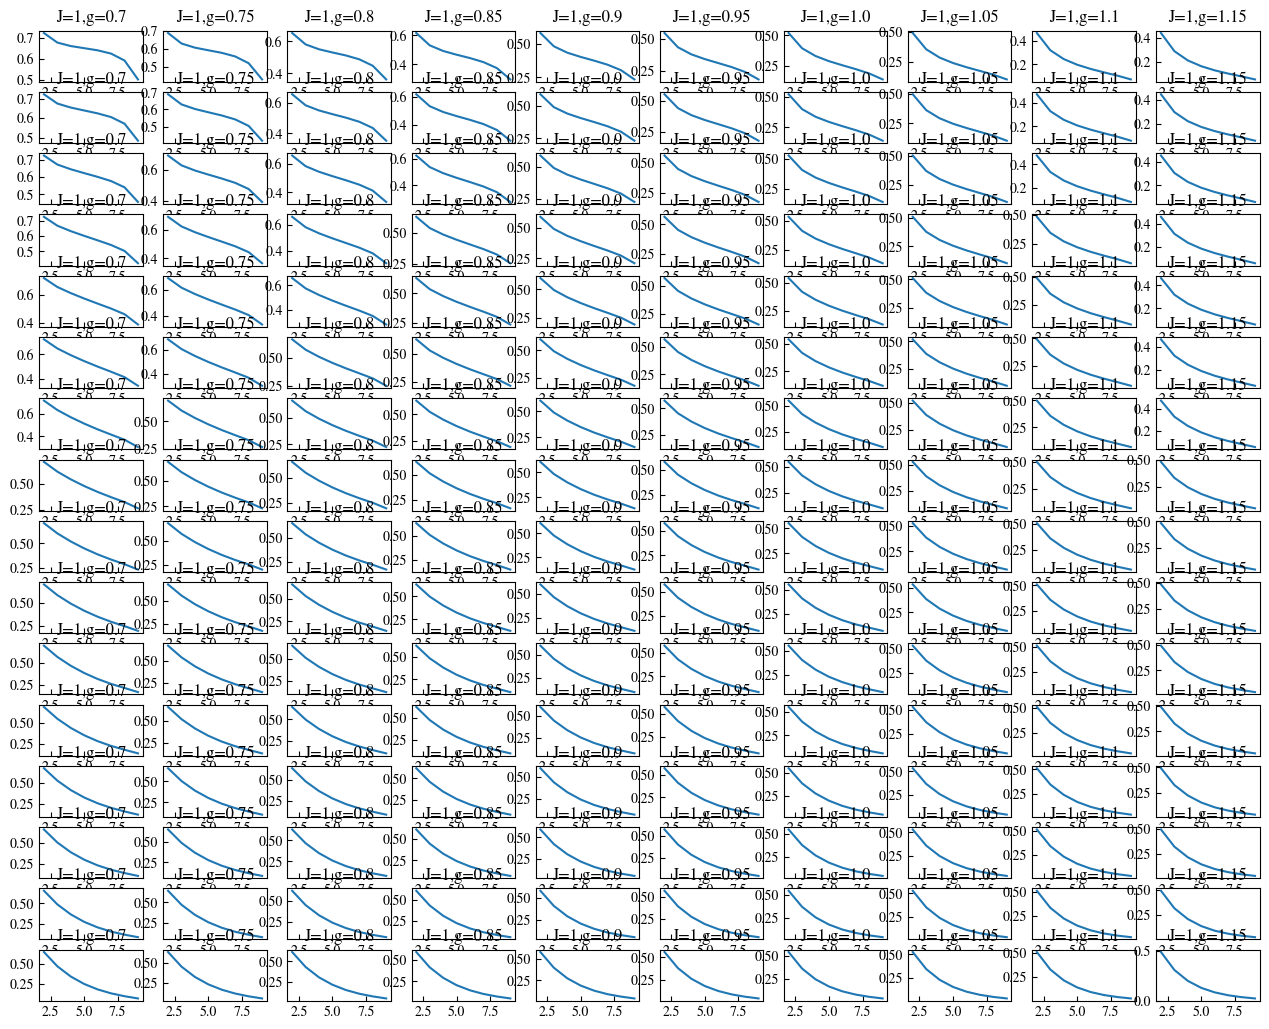

In [31]:
# N = 9
# T = 1
# nor = np.arange(0.05, 0.45, 0.1)
# J_list = np.array([1]) * nor
# h_list = np.array(np.arange(1.4, 1.8, 0.05))

# define figure size
import matplotlib.pyplot as plt
centimeter_to_inch = 1 / 2.54
figure_width = centimeter_to_inch * 40
figure_height = figure_width * 0.8
fig, ax = plt.subplots(len(T_list), len(h_list), figsize=(figure_width, figure_height))

# set all fonts
font_family = 'STIXGeneral'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = font_family

# set ticks in
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

# font size
font_size_name_xy = 30
font_size_tick_label = 26
font_size_legend = 16
font_xy = {'family': font_family, 'size': font_size_name_xy}
font_legend = {'family': font_family, 'size': font_size_legend}


for T in range(len(T_list)):
    for h in range(len(h_list)):

        fn = f'correlation/Z_gibbs_ising_nq{N}_T{round(T_list[T],2)}_h{round(h_list[h]*J, 2)}_J{round(J,2)}.npy'
        corr_term = np.load(fn)

        ax[T][h].plot(list(range(2,9+1)), corr_term)
        ax[T][h].set_title(f'J={round(J, 2)},g={round(h_list[h], 2)}')
        # ax[0].plot(round(h*J, 2), corr_term)
        # ax[J_list[J]][h_list[h]].ylabel(r'$\frac{T}{J}$')
        # ax[J_list[J]][h_list[h]].xlabel("g")

# plt.legend()

In [47]:
print(range(2,9+1))

range(2, 10)


### Renyi entropy with order 2

#S_A for A=[1,2...,i], where 1<= i <N